# Open University data analysis

This is a simple analysis of dataset related to Open Univeristy student information.
Firstly, we get an insight into the general student information: studentInfo.csv
This should include the overall distrubution by age and gender as well as final results.

Once this is established, attention will be given to other factors that might affect student withdrawal.

The dataset has been downoaded from the Open University
https://analyse.kmi.open.ac.uk/open_dataset




In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv

%matplotlib inline

# read the csv file 
df = pd.read_csv('studentInfo.csv')
assessment = pd.read_csv('studentAssessment.csv')
vle = pd.read_csv('studentVle.csv')
unreg = pd.read_csv('studentRegistration.csv')
courses = pd.read_csv('courses.csv')

In [2]:
# get info about data: column names and number of rows
print(df.shape)
print(df.columns)
print(assessment.columns)
print(assessment.shape)
print(vle.columns)
print(vle.shape)
print(unreg.columns)
print(unreg.shape)

(32593, 12)
Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')
Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'], dtype='object')
(173912, 5)
Index(['code_module', 'code_presentation', 'id_student', 'id_site', 'date',
       'sum_click'],
      dtype='object')
(10655280, 6)
Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration'],
      dtype='object')
(32593, 5)


In [3]:
# overview of data fields
df.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass


In [4]:
# function to display percentages on the bars
total = float(len(df))
def show_perc(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}'.format((height/total)*100),
            ha="center") 

# Student profile distribution


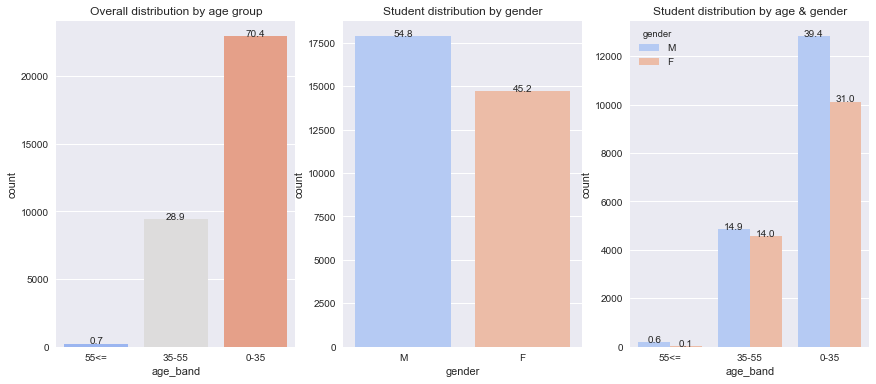

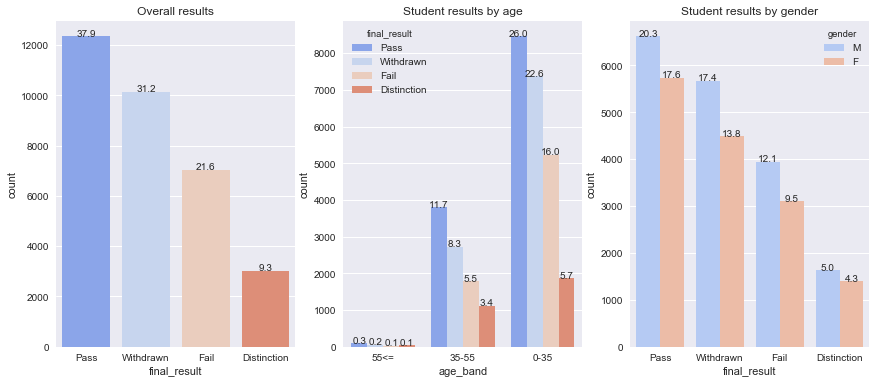

In [5]:
# plot all participants by age and gender
fig1 = plt.figure(figsize=(30,6))

ax1 = fig1.add_subplot(1,6,1)
g = sns.countplot('age_band', data=df, palette="coolwarm")
g.set_title("Overall distribution by age group")
show_perc(ax1)

ax2 = fig1.add_subplot(1,6,2)
g = sns.countplot('gender', data=df, palette="coolwarm")
g.set_title("Student distribution by gender")
show_perc(ax2)

# split participants by age and gender
ax3 = fig1.add_subplot(1,6,3)
g = sns.countplot('age_band', data=df, palette="coolwarm", hue='gender')
g.set_title("Student distribution by age & gender")
show_perc(ax3)

# plot all final results 
fig2 = plt.figure(figsize=(30,6))

ax4 = fig2.add_subplot(1,6,4)
g = sns.countplot('final_result', data=df, palette="coolwarm")
g.set_title("Overall results")
show_perc(ax4)

# view results by age 
ax5 = fig2.add_subplot(1,6,5)
g = sns.countplot('age_band', data=df, palette="coolwarm", hue='final_result')
g.set_title("Student results by age")
show_perc(ax5)

# view results by gender
ax6 = fig2.add_subplot(1,6,6)
g = sns.countplot('final_result', data=df, palette="coolwarm", hue='gender')
g.set_title("Student results by gender")
fig2.savefig('results.png')
show_perc(ax6)

# Observations

    Not very surprisingly, most students are in the 0-35 age group, more male students than female.
    Age gap in the 35-55 group is much less though and something that can be looked into.

    The results are less enthusiatic: Only 39% passes and 10% with distinction.

    The percentage of students who withdraw is quite high as is those who Fail.
    Hence further analysis will be given to these groups.

    Find correlation between students who withdraw and:
    * region
    * imd_score
    * highest education
    * previous attempts
    * number of credits

# Students who withdraw: the lost 30%

In [6]:
# convert data in the original dataset from categorical to numerical (it is easier to analyse)
df_encoded = pd.get_dummies(df, columns=['age_band','gender','disability', 'highest_education','imd_band','region', 'final_result'], drop_first=True)
df_encoded.columns

Index(['code_module', 'code_presentation', 'id_student',
       'num_of_prev_attempts', 'studied_credits', 'age_band_35-55',
       'age_band_55<=', 'gender_M', 'disability_Y',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'final_result_Fail', 'final_result_Pass', 'final_result_Withdrawn'],
      dtype='object')

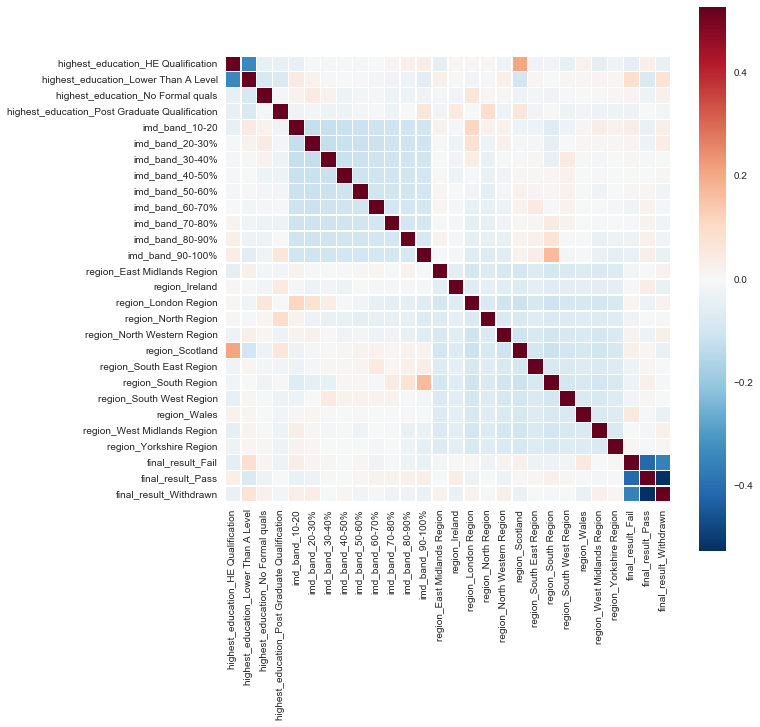

In [7]:
# visual representation of correlations using heatmap
plt.figure(figsize=(10, 10))
features = ['highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification','imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 
       'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'final_result_Fail', 'final_result_Pass', 'final_result_Withdrawn']
corr = df_encoded[features].corr()
sns.heatmap(corr, square = True, linewidths = 0.5, vmax = 0.1)
plt.savefig('complete_heatmap.png')

In [8]:
# Look at only the students who withdraw
withdraw = df[df['final_result'] == "Withdrawn"]
# get info about data: column names and number of rows
print('number of students who withdrew:',withdraw.shape)

number of students who withdrew: (10156, 12)


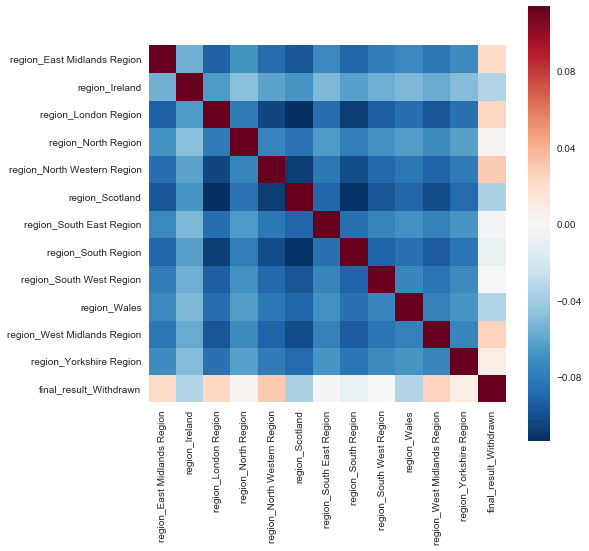

In [9]:
# visual representation of correlation between withdrawal and regions using heatmap
plt.figure(figsize=(8,8))
features = ['region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region', 
       'final_result_Withdrawn']
corr = df_encoded[features].corr()
sns.heatmap(corr, square = True, vmax = 0.1 )

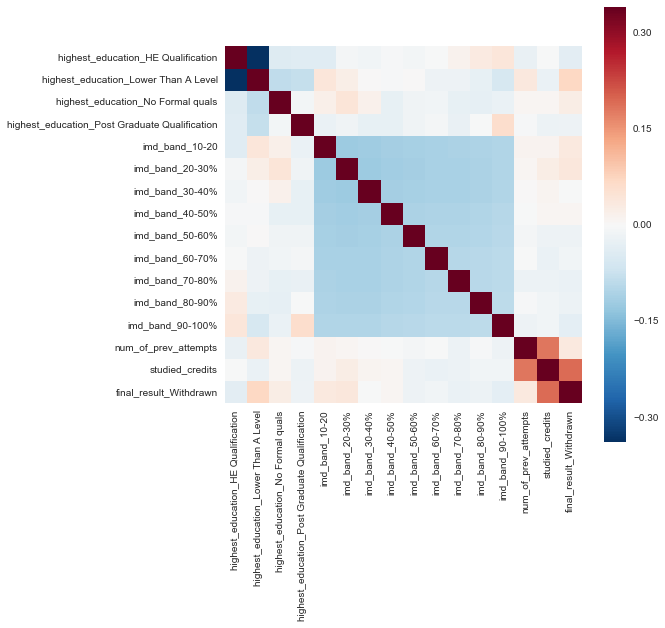

In [10]:
# visual representation of correlations using heatmap
plt.figure(figsize=(8,8))
features = ['highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification','imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 
       'num_of_prev_attempts',
       'studied_credits',
       'final_result_Withdrawn']
corr = df_encoded[features].corr()
sns.heatmap(corr, square = True, vmax = 0.3 )

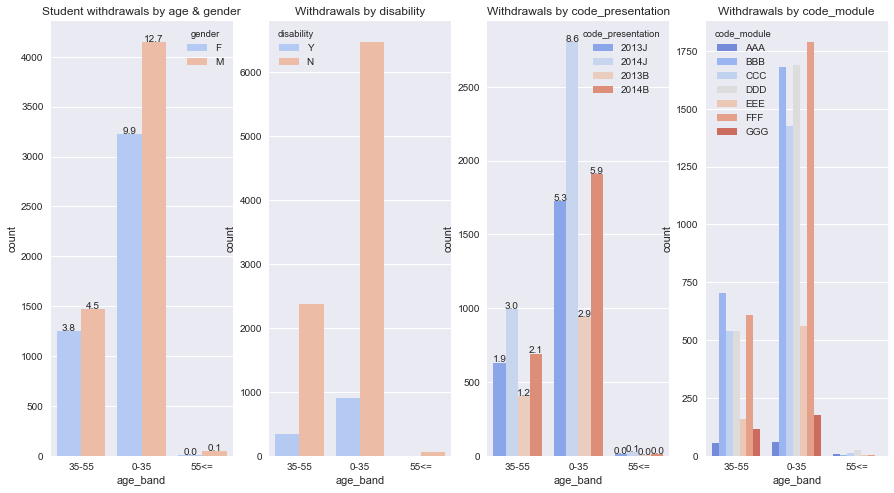

In [11]:
# plot other factors
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(1,4,1)
g = sns.countplot('age_band', data=withdraw, palette="coolwarm", hue='gender')
g.set_title("Student withdrawals by age & gender")
show_perc(ax1)

ax2 = fig.add_subplot(1,4,2)
g = sns.countplot('age_band', data=withdraw, palette="coolwarm", hue='disability')
g.set_title("Withdrawals by disability")
#show_perc(ax2)

# split participants by age and gender
ax3 = fig.add_subplot(1,4,3)
g = sns.countplot('age_band', data=withdraw, palette="coolwarm", hue='code_presentation')
g.set_title("Withdrawals by code_presentation")
show_perc(ax3)

# split participants by age and gender
ax4 = fig.add_subplot(1,4,4)
g = sns.countplot('age_band', data=withdraw, palette="coolwarm", hue='code_module')
g.set_title("Withdrawals by code_module")
#show_perc(ax3)



In [12]:
# code_module by numbers
df.code_module.value_counts()

BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64

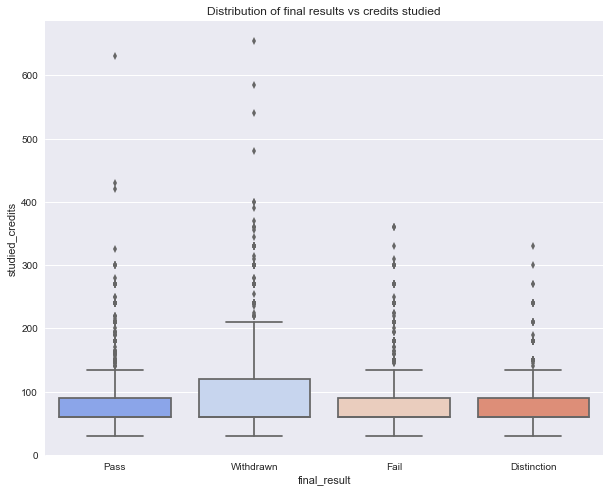

In [13]:
# look at studied_credits as it has the most positive correlation with withdrawal
g = sns.boxplot(df['final_result'], df.studied_credits, palette="coolwarm")
g.figure.set_size_inches(10,8)
g.set_title("Distribution of final results vs credits studied")

0    8685
1    1150
2     247
3      53
4      14
5       5
6       2
Name: num_of_prev_attempts, dtype: int64


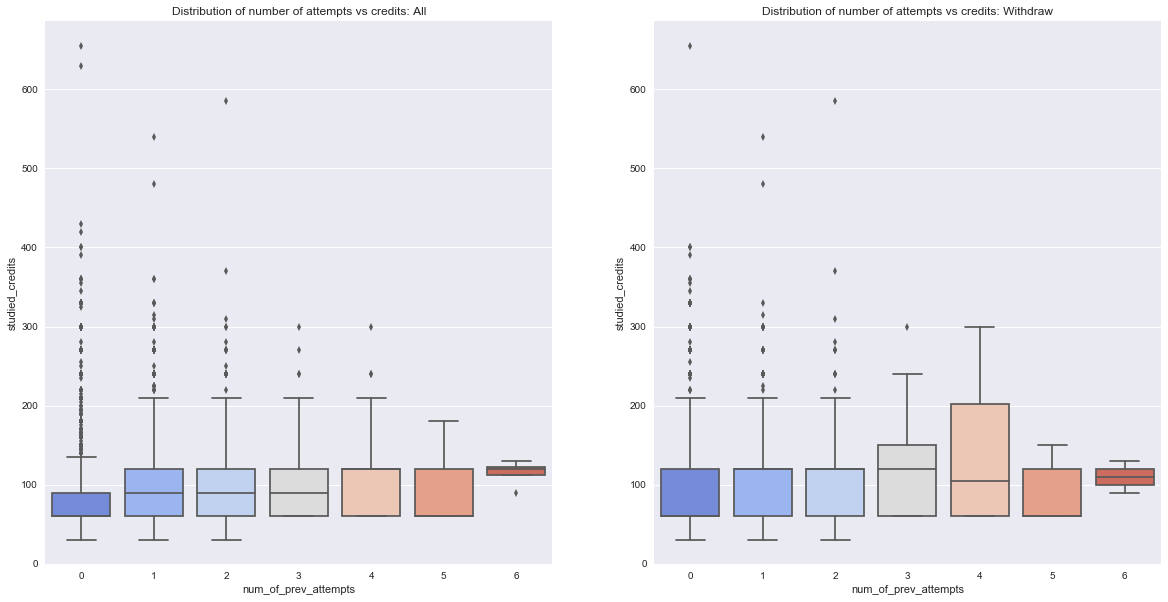

In [14]:
# plot number of previous attempts against credits
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,2,1)
g = sns.boxplot(df.num_of_prev_attempts, df.studied_credits, palette="coolwarm")
g.set_title("Distribution of number of attempts vs credits: All")

ax2 = fig.add_subplot(1,2,2)
g = sns.boxplot(withdraw.num_of_prev_attempts, withdraw.studied_credits, palette="coolwarm")
g.set_title("Distribution of number of attempts vs credits: Withdraw")

print(withdraw.num_of_prev_attempts.value_counts())

# An insight into profile of students who withdraw

    * As expected, the number of students who withdraw is higher for 0-35 age group, not disabled students male students. This is not significant as more students enrol in this group.

    * For the same reasons, more students withdraw from BBB, DDD and FFF code modules

    * Increase from 2013 to 2014. More students who enrol in October withdraw compared to January but overall, more student enrol in October. So this is not very significant. 
    
    * More interesting information can be gleaned from the heatmaps
    Clearly, fewer students from Ireland, Scotland and Wales (negative correlation)
    More students from Midlands, London and the North-West
    
    * imd_bands also give some interesting information:
    higher_education is correlated to imd_band: those from 10-30% having A level Quals or less whereas 90-100% having a Post Graduate Qual. This is a presumed trend and it can be observed here. It can also be seen that the students who already have a degree are less likely to withdraw
    
    * While it is not directly relevant, number of previous attempts is more for students who have not attended univeristy before. Hence more the number of studied credits, higher the chance of withdrawal
    
** As a summary, the most positive correlation is with studied credit. This is in turn correlated the most with number of previous attempts. Students who have never been to univeristy or even achieved A Level have the most previous attempts. So this is a causal link. It can also be observed that that higher education is correlated to region and more than that, imd_band. 
There may be other factors affecting the studied credits and pointers like assessments, courses taken and/or VLE engagement. That would form the basis for the next data story.** 

The next data story is done in 5 parts:
* date of withdrawal    
* students who are disadvantaged due to their background 
* scores and student withdrawal
* VLE engagement and student withdrawal
* disabled students analysis

**Part 1: date of withdrawal**

**date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation.**

To get an idea when students withdraw relative to the start date, we can analyse this field

number of students who withdraw: 10033
number of students who withdrew before the start of module presentation: 2643
number of students who withdrew in the first 30 days after the start of the module presentation: 2446
mean module presentation length 255.54545454545453


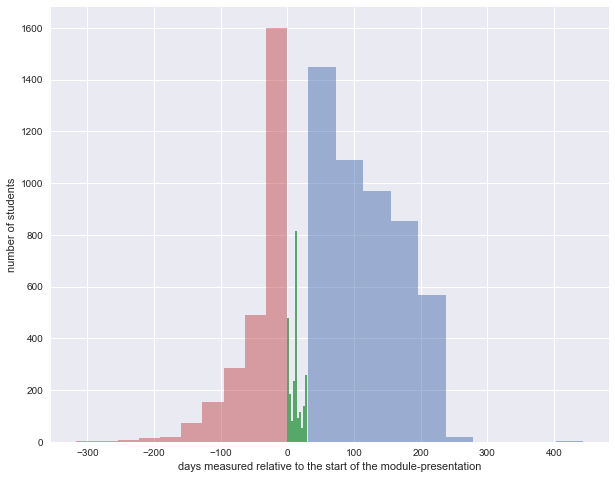

In [15]:
# find out how many students withdraw before the module presentation, in the first month and after that

w_reg = unreg.dropna()
print('number of students who withdraw:',len(w_reg))
neg_reg = w_reg[w_reg['date_unregistration'] < 0]
print('number of students who withdrew before the start of module presentation:',len(neg_reg))
low_reg = w_reg[(w_reg['date_unregistration'] >=0) & (w_reg['date_unregistration'] <= 30)]
print('number of students who withdrew in the first 30 days after the start of the module presentation:',len(low_reg))
print('mean module presentation length',courses.module_presentation_length.mean())
# visual representation
plt.figure(figsize=(10,8))

reg = w_reg[w_reg['date_unregistration'] > 30]
reg.date_unregistration.hist(alpha=0.5)
low_reg.date_unregistration.hist(alpha=1.0)
neg_reg.date_unregistration.hist(alpha=0.5)
plt.xlabel('days measured relative to the start of the module-presentation')
plt.ylabel('number of students')

* 26% of students withdrew before the start of the course, majority just before
* 25% withdraw in the first month

**Part 2: students who are disadvantaged due to their background**

In [16]:
# get overall data for final result
print('Overall final results',df.final_result.value_counts())

#separate students who withdrew
w_students = df[df['final_result'] == 'Withdrawn']
print('Students who withdrew:',w_students.shape)

Overall final results Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64
Students who withdrew: (10156, 12)


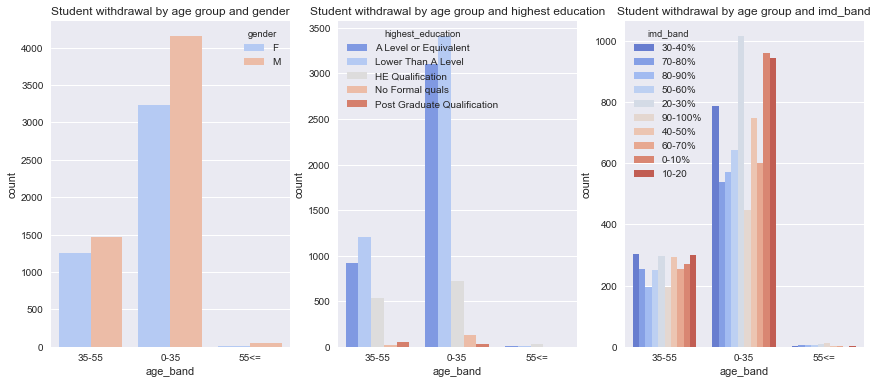

In [17]:
# plot all participants by age and gender
fig1 = plt.figure(figsize=(30,6))

ax1 = fig1.add_subplot(1,6,1)
g = sns.countplot('age_band', data=w_students, palette="coolwarm", hue='gender')
g.set_title("Student withdrawal by age group and gender")


ax2 = fig1.add_subplot(1,6,2)
g = sns.countplot('age_band', data=w_students, palette="coolwarm", hue='highest_education')
g.set_title("Student withdrawal by age group and highest education")

# split participants by age and gender
ax3 = fig1.add_subplot(1,6,3)
g = sns.countplot('age_band', data=w_students, palette="coolwarm", hue='imd_band')
g.set_title("Student withdrawal by age group and imd_band")

In [18]:
# imd_band and highest education in numbers of students
print(df.groupby(['final_result','imd_band']).size().unstack())
print(df.groupby(['final_result','highest_education']).size().unstack())

imd_band      0-10%  10-20  20-30%  30-40%  40-50%  50-60%  60-70%  70-80%  \
final_result                                                                 
Distinction     168    191     263     315     293     297     299     313   
Fail            916    912     844     784     697     701     538     599   
Pass            996   1167    1226    1345    1224    1227    1209    1170   
Withdrawn      1231   1246    1321    1095    1042     899     859     797   

imd_band      80-90%  90-100%  
final_result                   
Distinction      328      358  
Fail             495      421  
Pass            1165     1101  
Withdrawn        774      656  
highest_education  A Level or Equivalent  HE Qualification  \
final_result                                                 
Distinction                         1496               697   
Fail                                2707               790   
Pass                                5812              1960   
Withdrawn                    

As we have observed before:
* More students who withdraw have A Level or Lower Quals
* They are more likely to be in 0-30% imd_band
* Mostly 0-35 in age

We define these as disadvantaged students or those most at risk.

Lets see how many students who satisfy at least one of the criteria withdraw

In [19]:
# students who start with a disadvantage

low_band = df[(df['imd_band']== '0-10%')| (df['imd_band']== '10-20%')| (df['imd_band']== '20-30%')]
print('Number of students from lower imd_band(0-30%):',low_band.shape)
print(low_band.final_result.value_counts())
print(25*'-')
low_ed = df[(df['highest_education']== 'Lower Than A Level')|(df['highest_education']== 'No Formal quals')]
print('Number of students from A level or lower Quals:',low_ed.shape)
print(low_ed.final_result.value_counts())
print(25*'-')
disadv = df[(df['highest_education']== 'Lower Than A Level')|(df['highest_education']== 'No Formal quals')|(df['imd_band']== '0-10%')| (df['imd_band']== '10-20%')| (df['imd_band']== '20-30%')]
print('Number of students deemed at risk as they have educational or imd_band disadvantage:',disadv.shape)
print(disadv.final_result.value_counts())
print(25*'-')

Number of students from lower imd_band(0-30%): (6965, 12)
Withdrawn      2552
Pass           2222
Fail           1760
Distinction     431
Name: final_result, dtype: int64
-------------------------
Number of students from A level or lower Quals: (13505, 12)
Withdrawn      4769
Pass           4472
Fail           3521
Distinction     743
Name: final_result, dtype: int64
-------------------------
Number of students deemed at risk as they have educational or imd_band disadvantage: (17127, 12)
Withdrawn      6006
Pass           5774
Fail           4299
Distinction    1048
Name: final_result, dtype: int64
-------------------------


In [20]:
print('Disadvantaged students by gender:\n',disadv.gender.value_counts())
print('Disadvantaged students by disability:\n',disadv.disability.value_counts())

Disadvantaged students by gender:
 M    8884
F    8243
Name: gender, dtype: int64
Disadvantaged students by disability:
 N    15157
Y     1970
Name: disability, dtype: int64


    * Out of 32593 enrolled students, 17127 or 52.5% deemed at risk as they have both educational as well as imd_band disadvantage
    * Among these 17127 students, 6006 withdrew or 35%
    * However, out of 10156 students who withdrew overall, 59% of are in the disadvantaged category
    * Gender or disability does not appear to have a big impact on student withdrawal but this will be explored later

In [21]:
# convert data in the original dataset from categorical to numerical (it is easier to analyse)
disadv_encoded = pd.get_dummies(disadv, columns=['age_band','gender','disability', 'highest_education','imd_band','region', 'final_result'], drop_first=True)

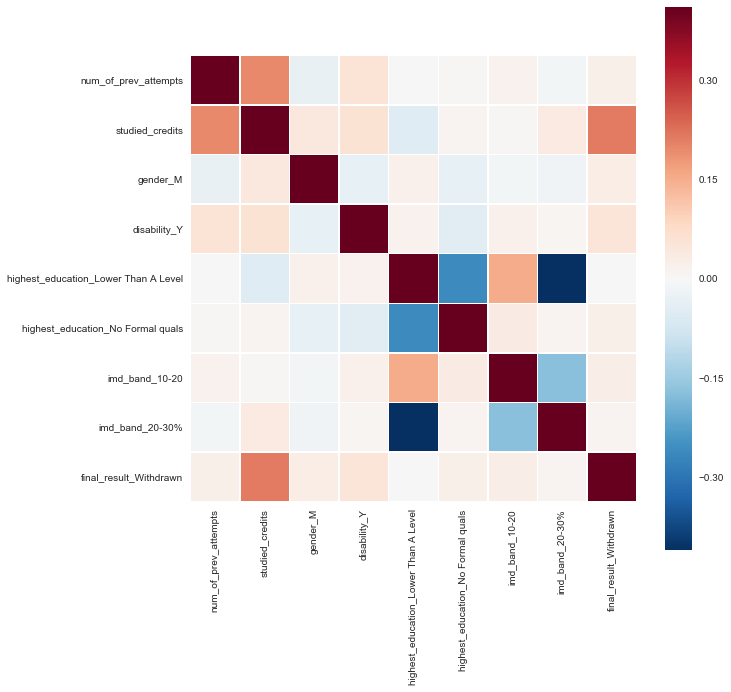

In [22]:
# visual representation of correlations using heatmap
plt.figure(figsize=(10, 10))
features = ['num_of_prev_attempts', 'studied_credits', 'gender_M', 'disability_Y',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'imd_band_10-20',
       'imd_band_20-30%', 'final_result_Withdrawn']
corr = disadv_encoded[features].corr()
sns.heatmap(corr, square = True, linewidths = 0.5, vmax = 0.05)

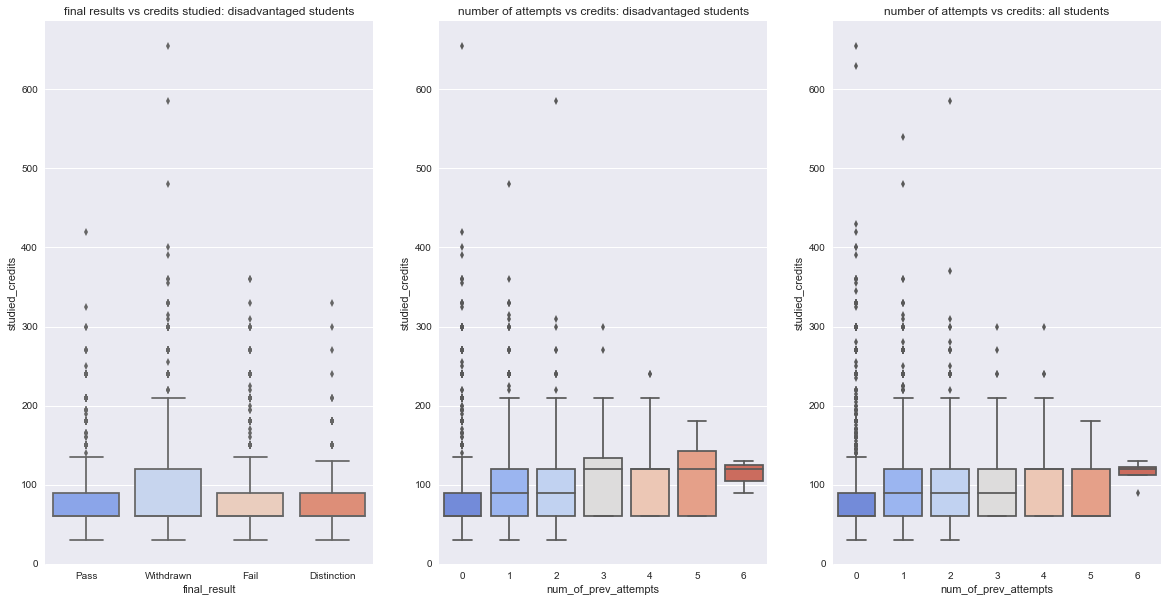

In [23]:
# look at studied_credits as it has the most positive correlation with withdrawal
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,3,1)
g = sns.boxplot(disadv['final_result'], df.studied_credits, palette="coolwarm")
g.set_title("final results vs credits studied: disadvantaged students")

ax2 = fig.add_subplot(1,3,2)
g = sns.boxplot(disadv.num_of_prev_attempts, disadv.studied_credits, palette="coolwarm")
g.set_title("number of attempts vs credits: disadvantaged students")

ax3 = fig.add_subplot(1,3,3)
g = sns.boxplot(df.num_of_prev_attempts, df.studied_credits, palette="coolwarm")
g.set_title("number of attempts vs credits: all students")

In [24]:
print(disadv.gender.value_counts())
print(disadv.disability.value_counts())

M    8884
F    8243
Name: gender, dtype: int64
N    15157
Y     1970
Name: disability, dtype: int64


In [25]:
# previous attempts: disadvantaged students
print('previous attempts: disadvantaged students')
print(disadv.num_of_prev_attempts.value_counts())
print(25*'-')
# previous attempts: all students
print('previous attempts: all students')
df.num_of_prev_attempts.value_counts()

previous attempts: disadvantaged students
0    14721
1     1867
2      406
3       94
4       26
5       10
6        3
Name: num_of_prev_attempts, dtype: int64
-------------------------
previous attempts: all students


0    28421
1     3299
2      675
3      142
4       39
5       13
6        4
Name: num_of_prev_attempts, dtype: int64

**Part 3: The above analysis shows studied credits and previous attempts is related to withdrawal.
Wht the students fail is a complete project by itself but here is some analysis**

In [26]:
# merge profile and assessment data
merged_score = pd.merge(left=df,right=assessment, left_on='id_student', right_on='id_student')
print(merged_score.head(2))
print(merged_score.shape)

  code_module code_presentation  id_student gender               region  \
0         AAA             2013J       11391      M  East Anglian Region   
1         AAA             2013J       11391      M  East Anglian Region   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  90-100%     55<=                     0              240   
1  HE Qualification  90-100%     55<=                     0              240   

  disability final_result  id_assessment  date_submitted  is_banked  score  
0          N         Pass           1752              18          0   78.0  
1          N         Pass           1753              53          0   85.0  
(207319, 16)


In [27]:
# separate students who withdrew from the student profile
w_scores = merged_score[merged_score['final_result'] == 'Withdrawn']
print(w_scores.shape)
print('final results by scores',merged_score.final_result.value_counts())
print('number of unique student IDs',len(w_scores.id_student.unique()))

(25974, 16)
final results by scores Pass           118025
Fail            32976
Distinction     30344
Withdrawn       25974
Name: final_result, dtype: int64
number of unique student IDs 4854


** We can see that the students who withdraw have the lowest number of scores. Only 12.5% of the total.
Which leads to the question why the others did not take any assessment. **

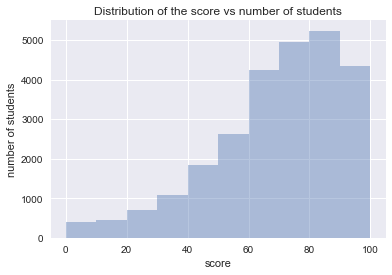

In [28]:
# histogram of all scores of withdrawn students
w_scores.score.hist(alpha=0.4)

# plot number of times a student has failed 
plt.xlabel('score')
plt.ylabel('number of students')
plt.title('Distribution of the score vs number of students')

number of low scores: 3011
number of unique student id: 1462


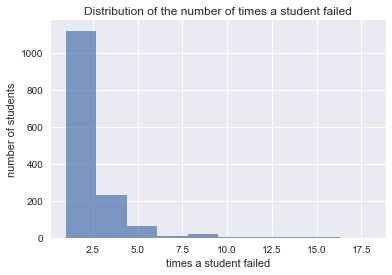

In [29]:
# find how many students have scores lower than 40
low_scores = w_scores[w_scores['score'] <= 40]
print('number of low scores:',len(low_scores))
print('number of unique student id:', len(low_scores.id_student.unique()))

# get number of students who failed more than once
count = low_scores.id_student.value_counts()

# plot number of times a student has failed 
plt.hist(count, alpha=0.7)
plt.xlabel('times a student failed')
plt.ylabel('number of students')
plt.title('Distribution of the number of times a student failed')

** From the above graphs, we can observe that students who withdraw do have lower scores but it is not very significant. Neither do scores seem to be a big factor in this decision**

** Part 4: VLE engagement and student withdrawal**

In [30]:
# merge profile and assessment data
merged_clicks = pd.merge(left=df,right=vle, left_on='id_student', right_on='id_student')
print(merged_clicks.shape)
print(merged_clicks.head(2))

(13006575, 17)
  code_module_x code_presentation_x  id_student gender               region  \
0           AAA               2013J       11391      M  East Anglian Region   
1           AAA               2013J       11391      M  East Anglian Region   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  90-100%     55<=                     0              240   
1  HE Qualification  90-100%     55<=                     0              240   

  disability final_result code_module_y code_presentation_y  id_site  date  \
0          N         Pass           AAA               2013J   546669    -5   
1          N         Pass           AAA               2013J   546662    -5   

   sum_click  
0         16  
1         44  


In [31]:
# separate students who withdrew from the student profile
withdraw_clicks = merged_clicks[merged_clicks['final_result'] == 'Withdrawn']
print(withdraw_clicks.shape)
withdraw_students_clicks = withdraw_clicks.id_student.unique()
print('Unique id:',len(withdraw_students_clicks))
print('All Students')
print(merged_clicks.sum_click.describe())
print(25*'-')
print('Students who withdraw')
print(withdraw_clicks.sum_click.describe())

(1830536, 17)
Unique id: 6769
All Students
count    1.300658e+07
mean     3.706290e+00
std      8.962795e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.977000e+03
Name: sum_click, dtype: float64
-------------------------
Students who withdraw
count    1.830536e+06
mean     3.485032e+00
std      8.405775e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.958000e+03
Name: sum_click, dtype: float64


** Of the students who have stayed in the module, it is fairly safe to say VLE does not seem to have a big influence **

** Part 5: disabled students analysis **

In [32]:
# view the analysis for disabled candidates
disabled = df[df['disability'] == 'Y']
not_disabled = df[df['disability'] == 'N']

print(disabled['gender'].value_counts())
print('So in all %3.2f percent disabled students are male' %((len(disabled[disabled.gender == 'M']))/(len(disabled))*100))
print('whereas %3.2f percent disabled students are female' %((len(disabled[disabled.gender == 'F']))/(len(disabled))*100))
print("-"*30)
print("Looking at highest education attained by disabled students")
print("-"*30)
print(disabled['highest_education'].value_counts())
print("-"*30)
print('Lower than A level: %3.2f percent' %((len(disabled[disabled.highest_education == 'Lower Than A Level']))/(len(disabled))*100))
print('A Level or Equivalent: %3.2f percent' %((len(disabled[disabled.highest_education == 'A Level or Equivalent']))/(len(disabled))*100))
print('HE Qualification: %3.2f percent' %((len(disabled[disabled.highest_education == 'HE Qualification']))/(len(disabled))*100))
print('No Formal quals : %3.2f percent' %((len(disabled[disabled.highest_education == 'No Formal quals']))/(len(disabled))*100))
print("-"*30)
print("Comparing it with all students:")
print("-"*30)
print(not_disabled['highest_education'].value_counts())
print("-"*30)
print('Lower than A level: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'Lower Than A Level']))/(len(not_disabled))*100))
print('A Level or Equivalent: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'A Level or Equivalent']))/(len(not_disabled))*100))
print('HE Qualification: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'HE Qualification']))/(len(not_disabled))*100))
print('No Formal quals: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'No Formal quals']))/(len(not_disabled))*100))

F    1621
M    1543
Name: gender, dtype: int64
So in all 48.77 percent disabled students are male
whereas 51.23 percent disabled students are female
------------------------------
Looking at highest education attained by disabled students
------------------------------
Lower Than A Level       1552
A Level or Equivalent    1432
HE Qualification          175
No Formal quals             5
Name: highest_education, dtype: int64
------------------------------
Lower than A level: 49.05 percent
A Level or Equivalent: 45.26 percent
HE Qualification: 5.53 percent
No Formal quals : 0.16 percent
------------------------------
Comparing it with all students:
------------------------------
A Level or Equivalent          12613
Lower Than A Level             11606
HE Qualification                4555
No Formal quals                  342
Post Graduate Qualification      313
Name: highest_education, dtype: int64
------------------------------
Lower than A level: 39.44 percent
A Level or Equivalent: 42.

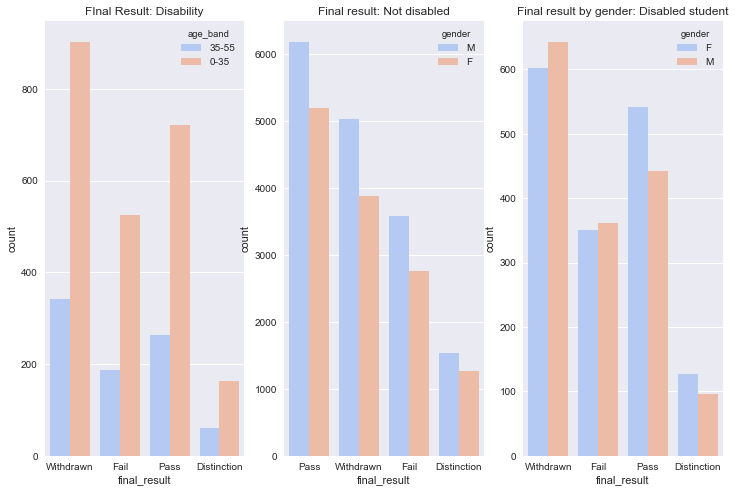

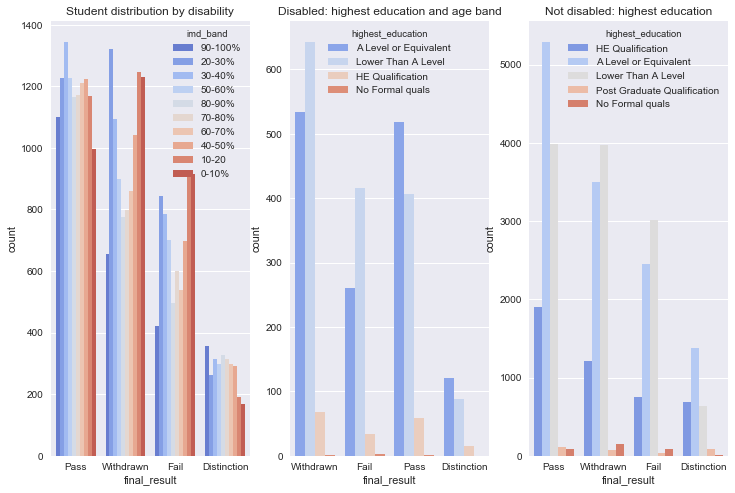

In [33]:
# plot all final results 
fig = plt.figure(figsize=(25,8))

ax1 = fig.add_subplot(1,6,1)
g = sns.countplot('final_result', data=disabled, palette="coolwarm", hue='age_band')
g.set_title("FInal Result: Disability")

# view results by age 
ax2 = fig.add_subplot(1,6,2)
g = sns.countplot('final_result', data=not_disabled, palette="coolwarm", hue='gender')
g.set_title("Final result: Not disabled")

# view results by gender
ax3 = fig.add_subplot(1,6,3)
g = sns.countplot('final_result', data=disabled, palette="coolwarm", hue='gender')
g.set_title("Final result by gender: Disabled student")

# visualise the above numbers
fig = plt.figure(figsize=(25,8))

ax4 = fig.add_subplot(1,6,1)
g = sns.countplot('final_result', data=df, palette="coolwarm", hue='imd_band')
g.set_title("Student distribution by disability")

ax5 = fig.add_subplot(1,6,2)
g = sns.countplot('final_result', data=disabled, palette="coolwarm", hue='highest_education')
g.set_title("Disabled: highest education and age band")


ax6 = fig.add_subplot(1,6,3)
g = sns.countplot('final_result', data=not_disabled, palette="coolwarm", hue='highest_education')
g.set_title("Not disabled: highest education")

In [34]:
new_disadv = df[(df['highest_education']== 'Lower Than A Level')|(df['highest_education']== 'No Formal quals')|(df['imd_band']== '0-10%')| (df['imd_band']== '10-20%')| (df['imd_band']== '20-30%')|((df['age_band']== '0-35')&(df['gender']== 'M')&(df['disability']== 'Y'))]
print('Number of students deemed at risk as they have both educational as well as imd_band disadvantage, are disabled, male and in the 0-35 age group:',new_disadv.shape)
print(new_disadv.final_result.value_counts())
print(25*'-')

Number of students deemed at risk as they have both educational as well as imd_band disadvantage, are disabled, male and in the 0-35 age group: (17597, 12)
Withdrawn      6170
Pass           5952
Fail           4391
Distinction    1084
Name: final_result, dtype: int64
-------------------------


We now have the profile for upto 60.5% of students who withdraw

The last part of the project is to predict with a certain degreee of accuracy whether a student will withdraw provided we have the following information:
* gender
* disability
* imd_band 0-30%
* higher education lower than A level

# Prediction using Logistic Regression and evaluation metrics


In [35]:
# functions for Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_encoded[[ 
       'num_of_prev_attempts', 'studied_credits', 'age_band_35-55',
       'age_band_55<=', 'gender_M', 'disability_Y',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region']].values, 
        (df.final_result == "Withdrawn").values,random_state=5)

clf = LogisticRegression()

# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# check the accuracy on the training set
print('Training accuracy:',clf.score(Xlr, ylr))
# check the accuracy from the testing data.
print('Test accuracy:',accuracy_score(clf.predict(Xtestlr), ytestlr))

Training accuracy: 0.697635411553
Test accuracy: 0.696527181249


/Applications/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Data Prep
Training
Predicting
[False False False ..., False False False]
class probabilities: [[ 0.70219784  0.29780216]
 [ 0.6784059   0.3215941 ]
 [ 0.66707329  0.33292671]
 ..., 
 [ 0.69715898  0.30284102]
 [ 0.75905892  0.24094108]
 [ 0.58609081  0.41390919]]


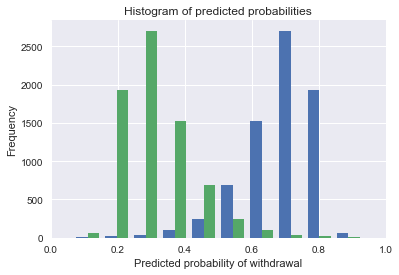

-------------------------
Evaluating
Using 10-fold cross-validation
cross validation scores: [ 0.69815951  0.6997955   0.6993865   0.7006135   0.69243354  0.69447853
  0.71317512  0.69476268  0.68686042  0.6966844 ]
mean score: 0.697634970448
-------------------------
generating metrics
accurancy score: 0.697436596673
roc score: 0.639329757166
f1 score: 0.615789021793
classification report:
             precision    recall  f1-score   support

      False       0.70      0.97      0.81      5048
       True       0.58      0.10      0.18      2286

avg / total       0.67      0.70      0.62      7334

confusion matrix
[[4877  171]
 [2048  238]]
-------------------------
plotting ROC curve


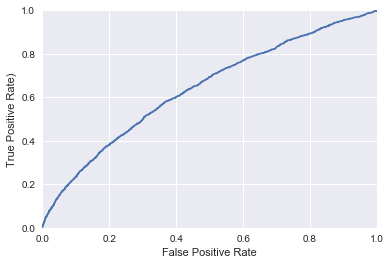

Done


In [36]:
# evaluate the model by splitting into train and test sets

print('Data Prep')

X_train, X_test, y_train, y_test = train_test_split(Xlr, ylr, test_size=0.3, random_state=0)

print('Training')
model2 = LogisticRegression()
model2.fit(X_train, y_train)

print('Predicting')
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

# generate class probabilities
probs = model2.predict_proba(X_test)
print('class probabilities:',probs)
plt.hist(probs) 
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of withdrawal')
plt.ylabel('Frequency')
plt.show()

print(25*'-')
print('Evaluating')
# evaluate the model using 10-fold cross-validation
print('Using 10-fold cross-validation')
scores = cross_val_score(LogisticRegression(), Xlr, ylr, scoring='accuracy', cv=10)
print('cross validation scores:',scores)
print('mean score:',scores.mean())

print(25*'-')
# generate evaluation metrics
print('generating metrics')
print('accurancy score:',metrics.accuracy_score(y_test, predicted))
print('roc score:',metrics.roc_auc_score(y_test, probs[:, 1]))
print('f1 score:',metrics.f1_score(y_test, predicted, average='weighted'))
print('classification report:')
print(metrics.classification_report(y_test, predicted))
print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

print(25*'-')
# plot ROC curve 
print('plotting ROC curve')
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1]) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

print('Done')

** Using classification algorithms, we can predict Withdrawal upto 70% accurately only based on demographic student profile. The metrics prove the classifier is good but there is room for improvement**